<a href="https://colab.research.google.com/github/MANSUsra/Pre-processing/blob/main/TP2_Word2Vec.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Je commence par le chargement du texte à traiter:

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving text to text


In [ ]:
import io
data = io.BytesIO(uploaded['text']).read().decode('utf-8')
print(data)

**Morocco and Marrakech: A Tapestry of Tradition and Modernity** Morocco, located at the crossroads of Europe and Africa, is a country drenched in history, mystery, and cultural richness. A testament to the ancient civilizations that once flourished here, this North African kingdom boasts a unique blend of Arab, Berber, and European influences. At the heart of Morocco's rich tapestry lies Marrakech, one of its four imperial cities and a vibrant epicenter of tradition and modernity. **Geographical Significance** Morocco is bordered by the Atlantic Ocean to the west, the Mediterranean Sea to the north, Algeria to the east and southeast, and the vast Sahara desert to the south. Its strategic location has historically made it a sought-after territory and a melting pot of cultures, religions, and trade routes. **Marrakech: The Red City** Marrakech, often referred to as "The Red City" due to its distinctive red-hued buildings, stands against the backdrop of the snow-capped Atlas Mountains. E

Maintenant, je commence le nettoyage du texte

In [ ]:
import re
#Normalisation
data = data.lower()
#Suppression des ponctuations et des caractères spéciaux
text_clean = re.sub(r'[^\w\s]','', data)
print(text_clean)


morocco and marrakech a tapestry of tradition and modernity morocco located at the crossroads of europe and africa is a country drenched in history mystery and cultural richness a testament to the ancient civilizations that once flourished here this north african kingdom boasts a unique blend of arab berber and european influences at the heart of moroccos rich tapestry lies marrakech one of its four imperial cities and a vibrant epicenter of tradition and modernity geographical significance morocco is bordered by the atlantic ocean to the west the mediterranean sea to the north algeria to the east and southeast and the vast sahara desert to the south its strategic location has historically made it a soughtafter territory and a melting pot of cultures religions and trade routes marrakech the red city marrakech often referred to as the red city due to its distinctive redhued buildings stands against the backdrop of the snowcapped atlas mountains established in the 11th century it has rem

In [ ]:
from nltk.tokenize import word_tokenize
import nltk
nltk.download('punkt')
nltk.download('punkt')
#Tokenisation
tokens = word_tokenize(text_clean)
print(tokens)

['morocco', 'and', 'marrakech', 'a', 'tapestry', 'of', 'tradition', 'and', 'modernity', 'morocco', 'located', 'at', 'the', 'crossroads', 'of', 'europe', 'and', 'africa', 'is', 'a', 'country', 'drenched', 'in', 'history', 'mystery', 'and', 'cultural', 'richness', 'a', 'testament', 'to', 'the', 'ancient', 'civilizations', 'that', 'once', 'flourished', 'here', 'this', 'north', 'african', 'kingdom', 'boasts', 'a', 'unique', 'blend', 'of', 'arab', 'berber', 'and', 'european', 'influences', 'at', 'the', 'heart', 'of', 'moroccos', 'rich', 'tapestry', 'lies', 'marrakech', 'one', 'of', 'its', 'four', 'imperial', 'cities', 'and', 'a', 'vibrant', 'epicenter', 'of', 'tradition', 'and', 'modernity', 'geographical', 'significance', 'morocco', 'is', 'bordered', 'by', 'the', 'atlantic', 'ocean', 'to', 'the', 'west', 'the', 'mediterranean', 'sea', 'to', 'the', 'north', 'algeria', 'to', 'the', 'east', 'and', 'southeast', 'and', 'the', 'vast', 'sahara', 'desert', 'to', 'the', 'south', 'its', 'strategic',

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
from nltk.corpus import stopwords
nltk.download('stopwords')
english_stopwords = set(stopwords.words('english'))
#Removing stopwords
clean_text = [word for word in tokens if word not in english_stopwords]
print(clean_text)

['morocco', 'marrakech', 'tapestry', 'tradition', 'modernity', 'morocco', 'located', 'crossroads', 'europe', 'africa', 'country', 'drenched', 'history', 'mystery', 'cultural', 'richness', 'testament', 'ancient', 'civilizations', 'flourished', 'north', 'african', 'kingdom', 'boasts', 'unique', 'blend', 'arab', 'berber', 'european', 'influences', 'heart', 'moroccos', 'rich', 'tapestry', 'lies', 'marrakech', 'one', 'four', 'imperial', 'cities', 'vibrant', 'epicenter', 'tradition', 'modernity', 'geographical', 'significance', 'morocco', 'bordered', 'atlantic', 'ocean', 'west', 'mediterranean', 'sea', 'north', 'algeria', 'east', 'southeast', 'vast', 'sahara', 'desert', 'south', 'strategic', 'location', 'historically', 'made', 'soughtafter', 'territory', 'melting', 'pot', 'cultures', 'religions', 'trade', 'routes', 'marrakech', 'red', 'city', 'marrakech', 'often', 'referred', 'red', 'city', 'due', 'distinctive', 'redhued', 'buildings', 'stands', 'backdrop', 'snowcapped', 'atlas', 'mountains'

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Dès que mon texte est prétraité; je peux commencer à entrainer le modèle Word2vec

In [ ]:
from gensim.models import Word2Vec
phrases = [clean_text]
modèle = Word2Vec(phrases, vector_size=150, window=8, min_count=1, workers=4)

Extraction de la représentation vectorielle du mot "morocco"

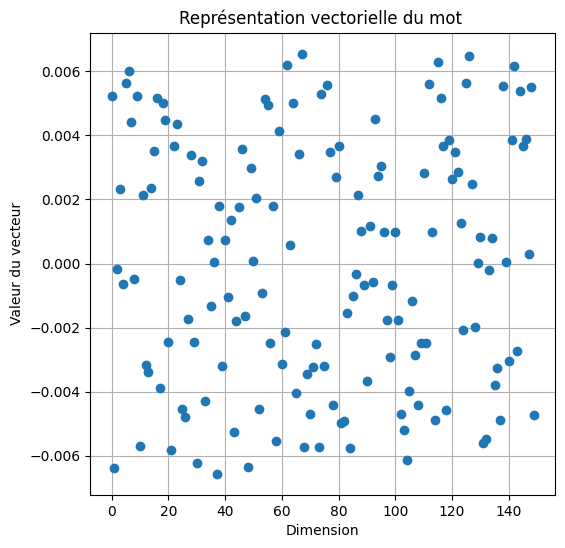

In [ ]:
import matplotlib.pyplot as plt
vecteur = modèle.wv['morocco']
#Visualisation
plt.figure(figsize=(6, 6))
plt.plot(vecteur, marker='o', linestyle='')
plt.title('Représentation vectorielle du mot ')
plt.xlabel('Dimension')
plt.ylabel('Valeur du vecteur')
plt.grid(True)
plt.show()

Calcul de similarité entre "morocco" et "marrakech"

In [ ]:
similarité = modèle.wv.similarity('morocco', 'marrakech')
print(similarité)

0.025766222


Extraction des mots contextuels (les plus similaires) pour un mot central donné "city"

In [ ]:
mots_similaires = modèle.wv.most_similar('city', topn=5)
print(mots_similaires)

[('contrast', 0.2337171584367752), ('paired', 0.18811187148094177), ('medina', 0.1833823025226593), ('backdrop', 0.17881108820438385), ('world', 0.17508694529533386)]
